<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Cуммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

**Задача:**

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Этапы работ:**
1. Подготовка данных.
2. Исследовательский анализ данных.
3. Построение и обучение модели.

**Описание данных:**

*Технологический процесс*

**Rougher feed** — исходное сырье
**Rougher additions (или reagent additions)** — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
**Rougher process (англ. «грубый процесс»)** — флотация
**Rougher tails** — отвальные хвосты
**Float banks** — флотационная установка
**Cleaner process** — очистка
**Rougher Au** — черновой концентрат золота
**Final Au** — финальный концентрат золота

Параметры этапов

**air amount** — объём воздуха
**fluid levels** — уровень жидкости
**feed size** — размер гранул сырья
**feed rate** — скорость подачи

Наименование признаков: [этап].[тип_параметра].[название_параметра]

Значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики.

Данные находятся в трёх файлах:

- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

## Подготовка данных

In [1]:
# Загрузим библиотеки
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from IPython.display import display

In [2]:
# Откроем и изучим данные.

data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
data_train.info()
data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
display(data_train.head())
display(data_test.head())
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Статистические данные

In [5]:
display(data_train.describe())
display(data_test.describe())
display(data_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Посмотрим размер файлов

In [6]:
data_train.shape, data_test.shape, data_full.shape

((14149, 87), (5290, 53), (19439, 87))

Приведем формат даты к нужному типу

In [7]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

Итак, в данных есть пропуски; есть аномальные значений 0. Обработаем ниже.

Проверим, что эффективность обогащения рассчитана правильно. 
Нужно смоделировать процесс восстановления золота из золотосодержащей руды. **Эффективность обогащения рассчитаем по формуле:** 

**- Recovery = С * (F - T)/F * (C - T)**, где
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

Вычислии её на обучающей выборке для признака rougher.output.recovery - эффективность обогащения чернового концентрата

In [8]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100
print(recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


Для того, чтобы понять степень ошибки прогноза, найдем MAE между расчётами и значением признака.

In [9]:
print ('MAE -', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE - 9.73512347450521e-15


Cредняя разница между фактическим значением признака и значением между расчетами, составляет 9,73e-15. Высокий показатель для метрики. Эффективность рассчитана правильно.

Изучим признаки, недоступные в тестовой выборке.

In [10]:
# по столбцам посмотрим какие признакие есть в обучающей, но нет в тестовой выборке
dif_list = set(data_train.columns) - set(data_test.columns)

In [11]:
display(dif_list)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [12]:
print('\nОтсутствующих признаков:', len(dif_list))


Отсутствующих признаков: 34


Пропуски обработаем. Данные индексируются датой и временем получения информации. Соседние по времени параметры похожии. Заменим их ближайшими методом bfill. Посмотрим размер выборок.

In [13]:
data_train = data_train.fillna(method='bfill')
data_test = data_test.fillna(method='bfill')
data_full = data_full.fillna(method='bfill')

In [14]:
print('Количество строк с пропусками в data_test', data_test.isna().sum().sum())
print('Количество строк с пропусками в data_train', data_train.isna().sum().sum())
print('Количество строк с пропусками в data_full', data_full.isna().sum().sum())

Количество строк с пропусками в data_test 0
Количество строк с пропусками в data_train 0
Количество строк с пропусками в data_full 0


Итак, в тестовой выборке 34 отсутствующих признака. Так, в основном отсутствуют значения по типам параметров продуктов. Важный момент - это отсутствие целевых признаков для модели и результата - rougher.output.recovery, final.output.recovery. Данные можно получить только после измерений.

Но для проверки качества оценки модели они нам нужны. Поэтому в тестовый файл для формирования выборки их добавим.

In [15]:
# добавим данные в data_test
data_test = data_test.merge(data_full[['rougher.output.recovery','final.output.recovery','date']], how='left', on='date')

Для обучения данные столбца date нам не потребуются. Можно удалить.

In [16]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

In [17]:
data_train.shape, data_test.shape

((14149, 86), (5290, 54))

Итак, открыты файлы и изучены основные данные.

Проведена минимальная предобработка. Методом bfill заменены пропуски. Удален ненужный для обучения столбец. Проверен расчёт эффективности обогащения. Вычислено значение MAE между данными и расчётными значениями эффективности - MAE - 9.73512347450521e-15. Эффективность обогащения рассчитана правильно. Проанализированы поля недоступные в тестовой выборке, где отсутствуют целевые признаки для моделей 'rougher.output.recovery', 'final.output.recovery'. Для проверки качества оценки модели поля 'rougher.output.recovery', 'final.output.recovery' добавлены в тестовый файл.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Концентрация золота (Au) на различных этапах очистки.

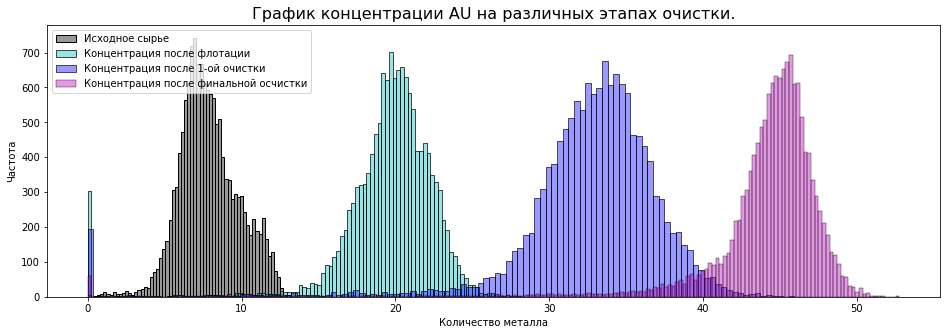

In [18]:
# построим графики

plt.figure(figsize=(16,5))
plt.title ('График концентрации AU на различных этапах очистки.', fontsize=16)
plt.xlabel('Количество металла', fontsize=10)
plt.ylabel('Частота', fontsize=10)

sns.histplot(data_train['rougher.input.feed_au'], label='Исходное сырье', color='k', alpha=0.4)
sns.histplot(data_train['rougher.output.concentrate_au'], label='Концентрация после флотации', color='c', alpha=0.4)
sns.histplot(data_train['primary_cleaner.output.concentrate_au'], label='Концентрация после 1-ой очистки', color='b', alpha=0.4)
sns.histplot(data_train['final.output.concentrate_au'], label='Концентрация после финальной осчистки', color='m', alpha=0.4)

plt.legend(loc='upper left')
plt.show()

In [19]:
data_train[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].mean()

rougher.output.concentrate_au            19.439958
primary_cleaner.output.concentrate_au    32.386836
final.output.concentrate_au              44.003792
dtype: float64

Концентрация серебра (Ag) на различных этапах очистки.

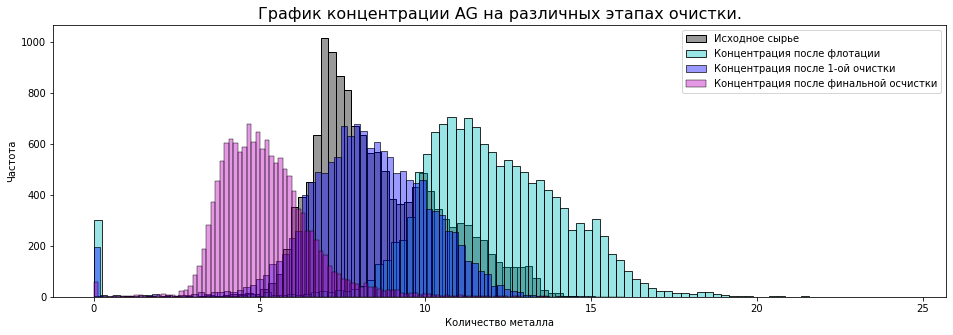

In [20]:
# построим графики

plt.figure(figsize=(16,5))
plt.title ('График концентрации AG на различных этапах очистки.', fontsize=16)
plt.xlabel('Количество металла', fontsize=10)
plt.ylabel('Частота', fontsize=10)

sns.histplot(data_train['rougher.input.feed_ag'], label='Исходное сырье', color='k', alpha=0.4)
sns.histplot(data_train['rougher.output.concentrate_ag'], label='Концентрация после флотации', color='c', alpha=0.4)
sns.histplot(data_train['primary_cleaner.output.concentrate_ag'], label='Концентрация после 1-ой очистки', color='b', alpha=0.4)
sns.histplot(data_train['final.output.concentrate_ag'], label='Концентрация после финальной осчистки', color='m', alpha=0.4)

plt.legend(loc='upper right')
plt.show()

In [21]:
data_train[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].mean()

rougher.output.concentrate_ag            11.775812
primary_cleaner.output.concentrate_ag     8.200916
final.output.concentrate_ag               5.141915
dtype: float64

Концентрация свинца (PB) на различных этапах очистки.

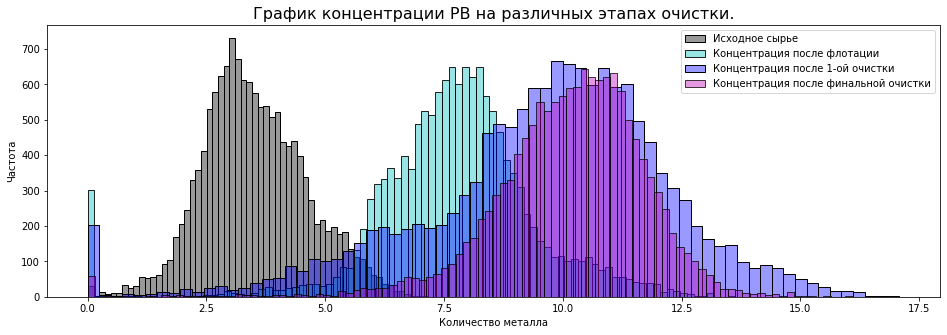

In [22]:
# построим графики

plt.figure(figsize=(16,5))
plt.title ('График концентрации PB на различных этапах очистки.', fontsize=16)
plt.xlabel('Количество металла', fontsize=10)
plt.ylabel('Частота', fontsize=10)

sns.histplot(data_train['rougher.input.feed_pb'], label='Исходное сырье', color='k', alpha=0.4)
sns.histplot(data_train['rougher.output.concentrate_pb'], label='Концентрация после флотации', color='c', alpha=0.4)
sns.histplot(data_train['primary_cleaner.output.concentrate_pb'], label='Концентрация после 1-ой очистки', color='b', alpha=0.4)
sns.histplot(data_train['final.output.concentrate_pb'], label='Концентрация после финальной очистки', color='m', alpha=0.4)

plt.legend(loc='upper right')
plt.show()

In [23]:
data_train[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].mean()

rougher.output.concentrate_pb             7.664555
primary_cleaner.output.concentrate_pb     9.568457
final.output.concentrate_pb              10.132841
dtype: float64

- Концентрация золота постепенно увеличивается на каждом этапе обработки сырья. 

- Концентрация серебра увеличивается на этапе флотации, затем уменьшается.

- Концентрация свинца сначала увеличивается на этапе флотации, затем остатется примерно на одном уровне.

В данных для металлов есть нулевые аномалии, выбросы. Их удалим из выборок для обучения.

### Распределения размеров гранул на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

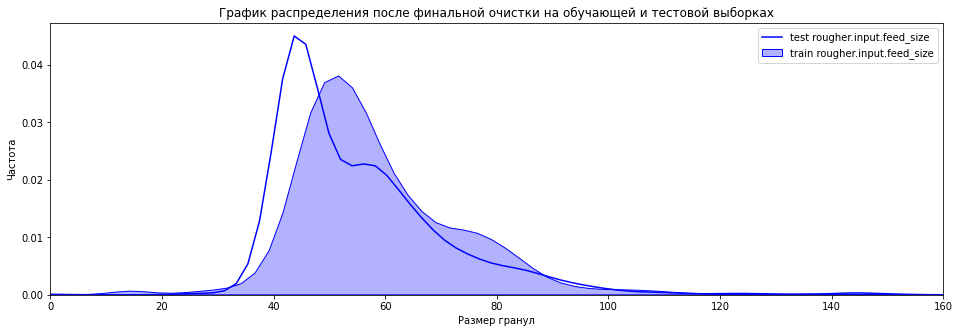

In [24]:
plt.figure(figsize=(16, 5))

sns.kdeplot(data_train['rougher.input.feed_size'], label='train rougher.input.feed_size', color='b', alpha=0.3, shade=True)
sns.kdeplot(data_test['rougher.input.feed_size'], label='test rougher.input.feed_size', color='b', alpha=0.3)


plt.xlim([0, 160])
plt.title(f'График распределения после финальной очистки на обучающей и тестовой выборках', fontsize=12)
plt.xlabel('Размер гранул')
plt.ylabel('Частота')
plt.legend(loc='upper right')

plt.show()           

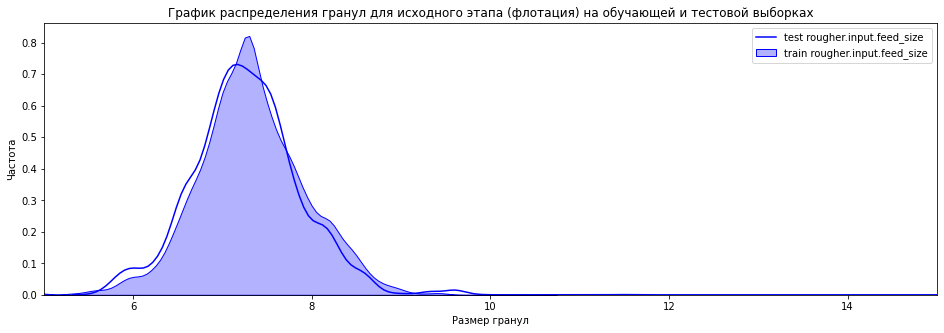

In [25]:
plt.figure(figsize=(16, 5))

sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label='train rougher.input.feed_size', color='b', alpha=0.3, shade=True)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label='test rougher.input.feed_size', color='b', alpha=0.3)


plt.xlim([5, 15])
plt.title(f'График распределения гранул для исходного этапа (флотация) на обучающей и тестовой выборках', fontsize=12)
plt.xlabel('Размер гранул')
plt.ylabel('Частота')
plt.legend(loc='upper right')

plt.show()           

По графикам распределения размеров гранул сырья на обучающей и тестовой выборках можно сказать, что значимых различий нет.
Распределения похожи.

### Cуммарная концентрация всех веществ на разных стадиях

Посчитаем суммарную концентрацию всех веществ на разных стадиях. Это сырье, черновой и финальный концентрат. Найдем значения в суммарном распределении.

Вычислим суммарную концентрацию всех элементов на каждом этапе

In [26]:
data_full['sum_rougher.input.feed'] = \
                data_full['rougher.input.feed_ag']\
              + data_full['rougher.input.feed_pb']\
              + data_full['rougher.input.feed_sol']\
              + data_full['rougher.input.feed_au']

In [27]:
data_full['sum_rougher.output.concentrate'] = \
                data_full['rougher.output.concentrate_ag']\
              + data_full['rougher.output.concentrate_pb']\
              + data_full['rougher.output.concentrate_sol']\
              + data_full['rougher.output.concentrate_au']

In [28]:
data_full['sum_final.output.concentrate'] = \
                data_full['final.output.concentrate_ag']\
              + data_full['final.output.concentrate_pb']\
              + data_full['final.output.concentrate_sol']\
              + data_full['final.output.concentrate_au']

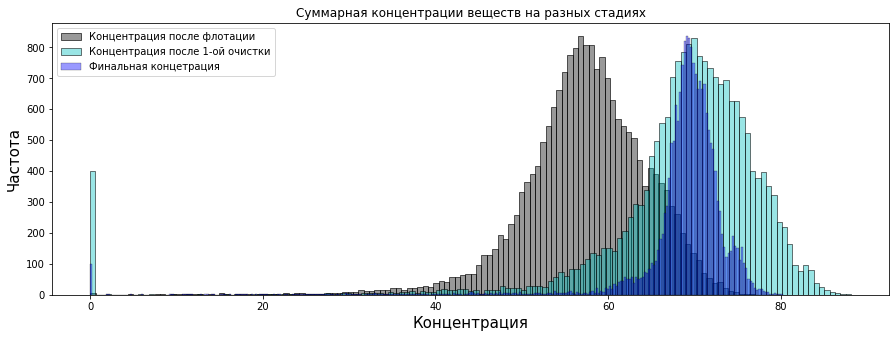

In [29]:
plt.figure(figsize=(15,5))

sns.histplot(data_full['sum_rougher.input.feed'], label='Концентрация после флотации', color='k', alpha=0.4)
sns.histplot(data_full['sum_rougher.output.concentrate'], label='Концентрация после 1-ой очистки', color='c', alpha=0.4)
sns.histplot(data_full['sum_final.output.concentrate'], label='Финальная концетрация', color='b', alpha=0.4)

plt.title('Cуммарная концентрации веществ на разных стадиях', fontsize=12)
plt.xlabel('Концентрация', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Суммарная концентрация веществ увеличивается к финальному этапу. Диапазон распределения суммарной концентрации веществ уменьшается.

Дополнительно построим диаграмму рассеяния.

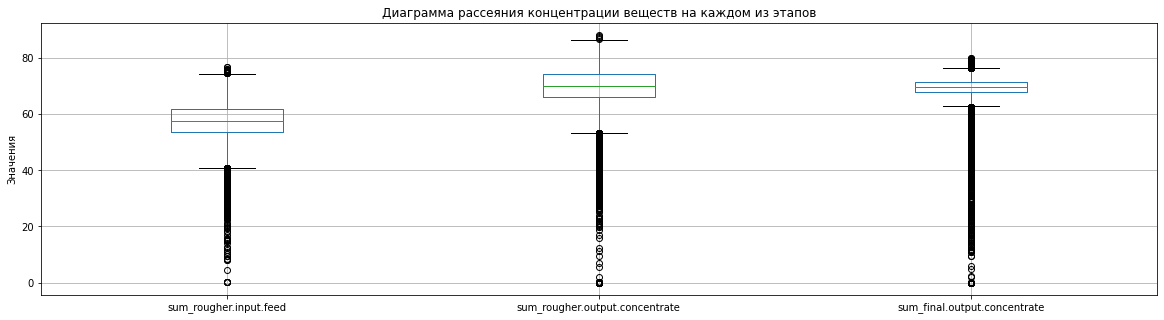

In [30]:
data_full[['sum_rougher.input.feed', 'sum_rougher.output.concentrate', 'sum_final.output.concentrate']].\
boxplot(figsize = (20,5))
plt.title('Диаграмма рассеяния концентрации веществ на каждом из этапов', fontsize=12)
plt.ylabel('Значения')
plt.show()

Итак, да логично невысокая частота значений до 40, но с учетом тех. процесса и этапов, обработаем для построения точной модели только аномальные 0 значения.

Необходимо убрать нулевые значения из выборки

In [31]:
data_train = data_train.drop(data_train[data_train['final.output.recovery'] == 0].index)

In [32]:
data_train[data_train['final.output.recovery'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [33]:
data_train = data_train.drop(data_train[data_train['rougher.output.recovery'] == 0].index)
data_train[data_train['rougher.output.recovery'] < 1].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [34]:
data_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [34]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0) & (data_train['rougher.output.concentrate_ag'] != 0) & (data_train['rougher.output.concentrate_pb'] != 0) & (data_train['rougher.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0) & (data_train['final.output.concentrate_ag'] != 0) & (data_train['final.output.concentrate_pb'] != 0) & (data_train['final.output.concentrate_sol'] != 0)]

In [35]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0) & (data_train['rougher.output.concentrate_ag'] != 0) & (data_train['rougher.output.concentrate_pb'] != 0) & (data_train['rougher.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0) & (data_train['final.output.concentrate_ag'] != 0) & (data_train['final.output.concentrate_pb'] != 0) & (data_train['final.output.concentrate_sol'] != 0)]

In [36]:
data_full = data_full[(data_full['rougher.input.feed_au'] != 0) & (data_full['rougher.input.feed_ag'] != 0) & (data_full['rougher.input.feed_pb'] != 0) & (data_full['rougher.input.feed_sol'] != 0)]
data_train = data_train[(data_train['rougher.input.feed_au'] != 0) & (data_train['rougher.input.feed_ag'] != 0) & (data_train['rougher.input.feed_pb'] != 0) & (data_train['rougher.input.feed_sol'] != 0)]

Также для таргета final есть большое количество выбросов от нуля до 45. Удалим выбросы попадающие в этот промежуток.

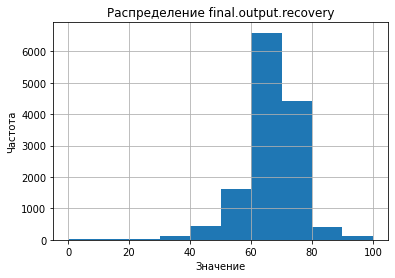

In [37]:
h = data_train['final.output.recovery'].hist()
fig = h.get_figure()
plt.title('Распределение final.output.recovery')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Не совсем понятно. Посмтроим с помощью sns.kdeplot

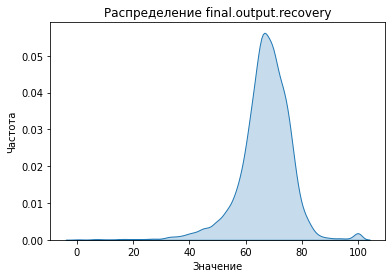

In [38]:
snsplot = sns.kdeplot(data_train['final.output.recovery'], shade=True)
fig = snsplot.get_figure()
plt.title('Распределение final.output.recovery')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

In [39]:
data_train = data_train[(data_train['final.output.recovery'] < 90)]

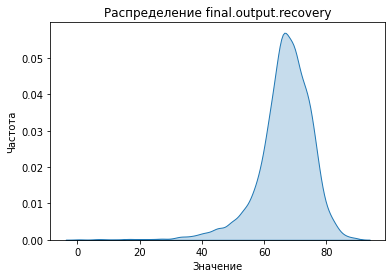

In [40]:
snsplot = sns.kdeplot(data_train['final.output.recovery'], shade=True)
fig = snsplot.get_figure()
plt.title('Распределение final.output.recovery')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Концентрация золота увеличивается с каждым этапом обработки. На всех графиках концентрации сырья видны значения равные нулю, они в обучении не нужны. Удалены аномальные значения из признаков final.output.recovery, rougher.input.feed_металл

Построены графики распределения плотности вероятности значений размеров гранул на входе в этапы флотации и финальной очистки выборок. Распределения похожи - размеров сырья в выборках однороден. 

## Модель

Удалим столбцы, которых нет в тестовой

In [41]:
delete_target = dif_list - set(['rougher.output.recovery','final.output.recovery'])

In [42]:
data_train = data_train.drop(columns=delete_target, axis=1)

Напишем функцию для sMAPE 

In [43]:
def smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [44]:
smape_scorer = make_scorer(smape, greater_is_better = False)

Напишем функцию для вычисления суммарного sMAPE

In [45]:
def final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

Определим столбцы для обучения

In [46]:
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher = data_train['rougher.output.recovery']
target_for_final = data_train['final.output.recovery']

Выведем метрику модели на кросс-валидации. И в итоге посчитаем взвешенную метрику. Используя инструмент smape_scorer оценим качество, т.к это регрессия, параметр должен быть низким (метрика отрицательная, умножим на -1)

**Модель LinearRegression**

In [47]:
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train,
                          target_for_rougher,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train,
                        target_for_final,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = final_smape(final_smape_rougher, final_smape_final)*(-1)

In [48]:
print(f'\nSMAPE для Модели LinearRegression - {result_smape}')


SMAPE для Модели LinearRegression - 9.697958814394523


**Модель DecisionTreeRegressor**

In [49]:
%%time
best_result = 70
best_param = 0
for n in range(2, 10, 1):
    model_rougher = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_rougher = cross_val_score(model_rougher,
                              features_train,
                              target_for_rougher,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_final = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_final = cross_val_score(model_final, 
                                  features_train,
                                  target_for_final,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result:
        best_result = result_smape
        best_param = n

CPU times: user 23.4 s, sys: 45.2 ms, total: 23.4 s
Wall time: 23.6 s


In [50]:
print(best_result, best_param)

8.94448812294064 2


**Модель RandomForestRegressor**

In [51]:
%%time
best_model_fr = 80
best_param_fr = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_fr_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_rougher = cross_val_score(model_fr_rougher,
                                  features_train,
                                  target_for_rougher,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_fr_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_final = cross_val_score(model_fr_final,
                                features_train,
                                target_for_final,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_fr:
            best_model_fr = result_smape
            best_param_fr = [n,d]

CPU times: user 13min 32s, sys: 828 ms, total: 13min 33s
Wall time: 13min 33s


In [52]:
print(best_model_fr, best_param_fr)

8.517490849324457 [70, 2]


Лучший результат - Модель RandomForestRegressor. Smape - 8.517. При n_estimators - 70, max_depth - 2.

Проверим модель на тестовой выборке
Обозначим признаки и проверим с лучшими параметрами.

In [53]:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']

In [54]:
model_test_rougher = RandomForestRegressor(n_estimators=70, max_depth=2, random_state=12345)
model_test_rougher.fit(features_train, target_for_rougher)
predicted_rougher = model_test_rougher.predict(features_test)

model_test_final = RandomForestRegressor(n_estimators=70, max_depth=2, random_state=12345)
model_test_final.fit(features_train, target_for_final)
predicted_final = model_test_final.predict(features_test)

smape_test_rougher = smape(target_rougher_test, predicted_rougher)
smape_test_final = smape(target_final_test, predicted_final)
final_smape_test = final_smape(smape_test_rougher, smape_test_final)

In [55]:
print(f'\nSMAPE для тестовой выборки - {final_smape_test}')


SMAPE для тестовой выборки - 9.01203730889519


In [56]:
dummy_regr_rougher = DummyRegressor(strategy="mean")
dummy_regr_final = DummyRegressor(strategy="mean")

dummy_regr_rougher.fit(features_train, target_for_rougher)
dummy_regr_final.fit(features_train, target_for_final)

dummy_predicted_rougher = dummy_regr_rougher.predict(features_test)
dummy_predicted_final = dummy_regr_final.predict(features_test)

smape_const_rougher = smape(target_rougher_test, dummy_predicted_rougher)
smape_const_final = smape(target_final_test, dummy_predicted_final)

final_smape_const = final_smape(smape_const_rougher, smape_const_final)

In [57]:
print(f'\nSMAPE для константной модели - {final_smape_const}')


SMAPE для константной модели - 9.957266616996412


Написана функция для вычисления итоговой sMAPE. 
Обучены модели линейной регрессии, дерева решений, а также случайного леса.
**Моделью с лучшими результатами прогноза является – RandomForestRegressor, Smape - 8.517 При n_estimators - 70, max_depth - 2.***
- Проведена предобработка данных. Методом bfill заменены пропуски. Удален ненужный для обучения столбец. 
- Проверен расчёт эффективности обогащения. Вычислено значение MAE между данными и расчётными значениями эффективности - MAE - 9.73512347450521e-15. Эффективность обогащения рассчитана правильно. Для проверки качества оценки модели поля 'rougher.output.recovery', 'final.output.recovery' добавлены в тестовый файл.
- Концентрация золота постепенно увеличивается на каждом этапе обработки сырья.
- Концентрация серебра увеличивается на этапе флотации, затем уменьшается.
- Концентрация свинца сначала увеличивается на этапе флотации, затем остаётся примерно на одном уровне.
- Изучены распределения размеров гранул сырья на обучающей и тестовой выборках - значимых различий нет. Распределения похожи.
- Проведено изучение результата на тестовой выборке (показатель - 9.012) и константной модели (SMAPE меньше константной модели 9.95 против 8.517)